In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 0 類 為 airplain


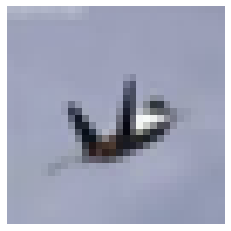

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import VGG19
cnn = VGG19(include_top=False, weights="imagenet", input_shape=(32, 32, 3))
cnn.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_VGG19.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.0001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=100,
          validation_split=0.1, callbacks=callback)

Epoch 1/100
150/150 [==============================] - 18s 120ms/step - loss: 8.4716 - accuracy: 0.2301 - val_loss: 3.7003 - val_accuracy: 0.3508
Epoch 2/100
150/150 [==============================] - 17s 110ms/step - loss: 4.1570 - accuracy: 0.3202 - val_loss: 2.5572 - val_accuracy: 0.3708
Epoch 3/100
150/150 [==============================] - 16s 110ms/step - loss: 2.9440 - accuracy: 0.3397 - val_loss: 2.0629 - val_accuracy: 0.3702
Epoch 4/100
150/150 [==============================] - 16s 110ms/step - loss: 2.3806 - accuracy: 0.3504 - val_loss: 1.8478 - val_accuracy: 0.3746
Epoch 5/100
150/150 [==============================] - 16s 109ms/step - loss: 2.1004 - accuracy: 0.3617 - val_loss: 1.7693 - val_accuracy: 0.3794
Epoch 6/100
150/150 [==============================] - 16s 110ms/step - loss: 1.9514 - accuracy: 0.3757 - val_loss: 1.7105 - val_accuracy: 0.4044
Epoch 7/100
150/150 [==============================] - 16s 109ms/step - loss: 1.8532 - accuracy: 0.3938 - val_loss: 1.6539 -

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.2055 - accuracy: 0.5912


[1.2055302858352661, 0.5911999940872192]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[1.4208486e-04, 4.2076316e-04, 5.9210595e-02, ..., 1.9586550e-02,
        1.3496459e-03, 3.9192440e-04],
       [8.2679435e-07, 4.2050899e-05, 2.4117844e-08, ..., 1.0273216e-10,
        9.9938202e-01, 5.7200593e-04],
       [6.3498966e-02, 1.0869445e-01, 3.3759724e-03, ..., 1.8599083e-03,
        6.4408255e-01, 1.4629194e-01],
       ...,
       [1.4272847e-04, 2.7195183e-03, 1.4447001e-02, ..., 2.2811338e-02,
        5.8542780e-04, 1.1806613e-02],
       [5.1532526e-02, 9.5925055e-02, 1.7924994e-01, ..., 4.5715898e-02,
        1.5336584e-02, 3.6632970e-02],
       [7.7013856e-06, 1.1350302e-05, 3.1263247e-05, ..., 9.9082839e-01,
        1.3504015e-06, 4.3921950e-06]], dtype=float32)

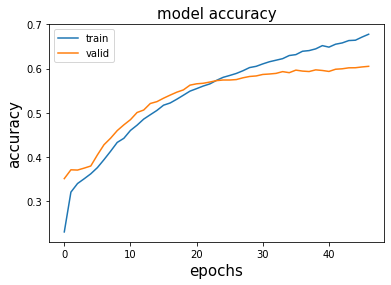

In [12]:
# 畫出 accuracy 圖
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

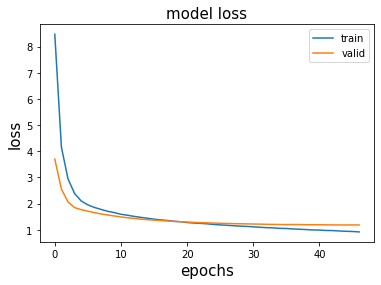

In [13]:
# 畫出 loss 圖
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 訓練資料平滑上升, 但測試資料不如預期時 val_accuracy=0.55 
+ dropout
